In [279]:
%reset -f 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata as intGrid
from random import randint

class Particle:
    def __init__(self,position,isdead=False):
        self.XY = np.array(position);
        self.isDed = isdead;
        return None
    
    def whereami(self):
        return self.XY;
    
    def wheretogo(self,VelField):
        self.v = np.array([float(intGrid(VelField.XY,VelField.Vx,self.XY)),\
                           float(intGrid(VelField.XY,VelField.Vy,self.XY))]);
        return self.v
    
    def move(self,deltaT):
        self.XY = self.XY + self.v*deltaT;
        return None
        
        
class Swarm:
    def __init__(self,nombre,size=0):
        self.swarm = list();
        self.X     = list();
        self.Y     = list();
        self.size  = 0;
        self.name  = str(nombre);
        return None
    def appendParticle(self,pepa):
        self.swarm.append(pepa);
        self.X.append(pepa.XY[0]);
        self.Y.append(pepa.XY[1]);
        self.size = len(self.swarm);
        return None
    def moveSwarm(self,VelField,dT):
        for pepa in self.swarm:
            pepa.wheretogo(VelField);
            pepa.move(dT);

class Mesh:
    def __init__(self,size):
        self.XY = np.array([[-size,-size],\
                            [size,-size],\
                            [-size,size],\
                            [size,size]],\
                           dtype="float");
        self.Vx = np.array([2,-2,2,-2],dtype="float");
        self.Vy = np.array([2,2,-2,-2],dtype="float");
        return None

In [280]:
part1  = Particle(np.array([99,0]),False);


In [281]:
mesh1  = Mesh(150)
swarm1 = Swarm(nombre="Holi")

[99.0, 99.0, 99.0, 99.0, 99.0]


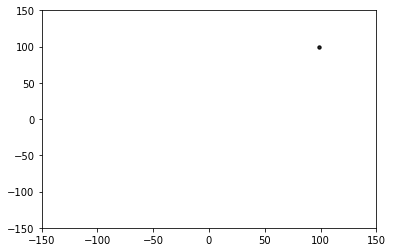

In [286]:
dt = 1;
del swarm1
swarm1 = Swarm(nombre="Holi??")
for t in range(5):
    if t<11:
        #wh = np.array([randint(-99,99),randint(-99,99)])
        wh = np.array([99.,99.])
        swarm1.appendParticle(Particle(wh,False))
    swarm1.moveSwarm(mesh1,5)
    plt.scatter(swarm1.X,swarm1.Y,s=10,c='k',alpha=0.1)

plt.ylim(-150,150)
plt.xlim(-150,150)
print(swarm1.X)